続いては XGBoost で回帰問題を扱ってみる。 回帰問題を扱うときは学習時のパラメータとして渡す objective が reg から始まるようになる。

次のサンプルコードでは XGBoost で Boston データセットを回帰している。 学習と検証の評価指標には RMSE (Root Mean Squared Error) を用いた。

In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import math

import xgboost as xgb

from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

"""XGBoost で回帰するサンプルコード"""

'XGBoost で回帰するサンプルコード'

In [3]:
#Bostonデータセットを読み込む
dataset = datasets.load_boston()
X, y = dataset.data, dataset.target

X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.3,
                                                   random_state=42,
                                                   )
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

xgb_params = {
    #回帰問題
    'objective':'reg:linear',
    #学習用の指標（RMSE）
    'eval_metric':'rmse',
}
evals = [(dtrain,'train'),(dtest,'eval')]
evals_result = {}
bst = xgb.train(xgb_params,
               dtrain,
               num_boost_round=1000,
               early_stopping_rounds=10,
               evals=evals,
               evals_result=evals_result,
               )

[0]	train-rmse:17.5096	eval-rmse:16.1546
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 10 rounds.
[1]	train-rmse:12.6429	eval-rmse:11.8465
[2]	train-rmse:9.23475	eval-rmse:8.79823
[3]	train-rmse:6.81161	eval-rmse:6.72694
[4]	train-rmse:5.09609	eval-rmse:5.4663
[5]	train-rmse:3.88894	eval-rmse:4.66465
[6]	train-rmse:3.01101	eval-rmse:4.09554
[7]	train-rmse:2.40174	eval-rmse:3.74569
[8]	train-rmse:1.98716	eval-rmse:3.55166
[9]	train-rmse:1.66979	eval-rmse:3.38234
[10]	train-rmse:1.4389	eval-rmse:3.26254
[11]	train-rmse:1.28697	eval-rmse:3.17529
[12]	train-rmse:1.15322	eval-rmse:3.12702
[13]	train-rmse:1.05013	eval-rmse:3.10193
[14]	train-rmse:1.00159	eval-rmse:3.08192
[15]	train-rmse:0.96022	eval-rmse:3.07048
[16]	train-rmse:0.9035	eval-rmse:3.04675
[17]	train-rmse:0.866479	eval-rmse:3.04651
[18]	train-rmse:0.802834	eval-rmse:3.03131
[19]	train-rmse:0.757689	eval-rmse:3.0351
[20]	train-rmse:0.726376	eva

In [4]:
y_pred = bst.predict(dtest)
mse = mean_squared_error(y_test, y_pred)
print('RMSE:',math.sqrt(mse))

RMSE: 3.0142536913006244


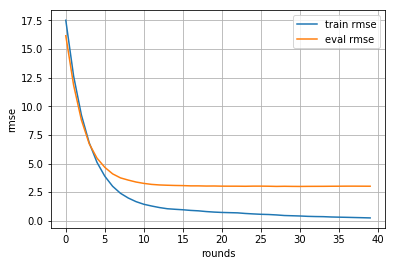

In [5]:
train_metric = evals_result['train']['rmse']
plt.plot(train_metric, label='train rmse')
eval_metric = evals_result['eval']['rmse']
plt.plot(eval_metric, label='eval rmse')
plt.grid()
plt.legend()
plt.xlabel('rounds')
plt.ylabel('rmse')
plt.show()